# ELE510 Image Processing and Computer Vision: LAB, Exercise  9, Introduction to Deep Learning.

**Purpose:** *To learn about Deep Learning and Neural Networks. Some basic experiments will be implemented using Pyhon, PyTorch, Numpy and other packages.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in the compendium [1]. See also the following documentations for help:
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [h5py](https://www.h5py.org/)
- [pytorch](https://pytorch.org/)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- Part of this assignment has been inspired by the [Deep Learning Specialization on Coursera](https://www.coursera.org/specializations/deep-learning).

- Despite its length, this assignment has been prepared as a tutorial for introducing you to the world of Deep Learning. Most of the cells contain information or explanations about the basic steps when implementing a neural network. Since most of the code is already prepared for you, the amount of code you are requested to fill out is significantly reduced compared to previous assignments. 

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- `dnn_utils.py` and `cnn_utils.py` provide some necessary functions for this notebook.
  
- `testCases.py` provides some random variables with a fixed seed to assess the correctness of the different functions you have to implement.
  o
- Seeds are used in `testCases.py` and some cells to keep all the random function calls consistent.

Take a look at `dnn_utils.py`, `cnn_utils.py` and `testCases.py` before starting in order to have a better understanding of what these scripts are providing you with.

In [7]:
# First set of libraries to load

import numpy as np
import h5py
import matplotlib.pyplot as plt
from dnn_utils import *
from testCases import *

## Problem 1.  Building your Deep Neural Network

In this problem, you will implement all the functions required to build a fully-connected neural network in NumPy. The aim is to provide you with insights about the mathematical and statistics behind the neural networks. These functions will be then used to build a deep neural network for image classification in Problem 2.

**Notation**:

In the images and text included in this notebook, you will find a large variety of symbols. Here you have a description of them:
- $X$ denotes the training data.
- $W$ and $b$ denote the layer parameters (weights and bias).
- $Y$ denotes the true "label" vectors.
- $Z$ denotes the linear forward module.
- $A$ denotes the activation.

Let's get started!

### 1 - Outline of the Problem

Here is an outline of this problem, you will:

- Initialize the parameters for a $L$-layer neural network.
- Implement the forward propagation module.
     - Forward propagation: Complete the LINEAR combination of the parameters and apply the ACTIVATION function.
     - Stack the forward propagation function according to the number of hidden layers and add the output layer (classifier) with the proper ACTIVATION. 
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
    - Backward propagation.
    - Stack the backward proapgation function according to the number of hidden layers and add the output layer.
- Finally update the parameters.

![Outline of Problem 1](./images/outline.png)

**Note that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module the cache is used to calculate the gradients.**

### 2 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for an L-layer model. 

**Exercise**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- Use random initialization for the weight matrices. Use `np.random.randn(shape) / np.sqrt(layer_dims[l-1])` with the correct shape. This is called LeCun Initialization as we are using `1 / np.sqrt(layer_dims[l-1])` to normalize the variance the weights.
- Use zeros initialization for the biases. Use `np.zeros(shape)`  with the correct shape..
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(layer_dims[l-1])
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [8]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network (input, hidden_1, ..., hidden_n, output)
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [9]:
# Set up some test inputs
np.random.seed(1)
parameters = initialize_parameters([5,4,3])

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected output**:
       
```
W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.4924124]]

b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]

b2 = [[ 0.]
 [ 0.]
 [ 0.]]
```

### 3 - Forward propagation module

### 3.1 - Forward propagation function

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing the basic forward propagation step for a single layer, and then apply it in a L-layer model.

The linear forward module (vectorized over all the examples) for the $[l]$-layer computes the following equation:

$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$

where $A^{[0]} = X$. Then, the activation function $g(.)$ (relu or sigmoid) is applied:

$A^{[l]} = g(Z^{[l]})$

The activation functions are provided in `dnn_utils.py`. Both of them return **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function).

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. To use it you could just call:
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

**Exercise**: Implement the forward propagation. You may find `np.dot()` useful. If your dimensions don't match, printing `W.shape` may help. Include also the `linear` activation, where the both the activation and the activation cache are the same as $Z$. 

In [10]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for a layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid", "linear" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    # Linear module and linear cache
    Z = np.dot(W, A_prev) + b
    linear_cache = (A_prev, W, b)

    # Activation
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"
    
    elif activation == "relu":
        A, activation_cache = relu(Z) # This "activation_cache" contains "Z"

    elif activation == "linear":
        A = activation_cache =  Z # This "activation_cache" contains "Z"
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [11]:
# Set up some test inputs
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "linear")
print("With linear: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
With linear: A = [[ 3.43896131 -2.08938436]]


**Expected output**:
       
```
With sigmoid:
    A = [[ 0.96890023    0.11013289]]

With ReLU:
    A = [[ 3.43896131   0.]]

With linear:
    A = [[ 3.43896131   -2.08938436]]
```


#### 3.2 Forward propagation for a L-layer model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the forward porpagation function on each layer.

**Exercise**: Implement the forward propagation of a model with $L-1$ hidden layers with ReLU activation followed by one output layer with sigmoid activation. Use the functions you had previously written.

**Tips**:
- In the code below, the variable `y_pred` will denote the predicitons. It refers to $\hat{y} = A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$.
- Don't forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

In [12]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the L-layer model computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    y_pred -- last post-activation value (predictions)
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    
    # Implement the hidden layers
    for l in range(1, L):
        A_prev = A 
        
        A, cache = linear_activation_forward(
            A_prev,
            parameters["W" + str(l)],
            parameters["b" + str(l)],
            activation="relu"
        ) # Use ReLU
        caches.append(cache)
    
    # Implement the output layer. Add "cache" to the "caches" list.
    y_pred, cache = linear_activation_forward(
        A,
        parameters["W" + str(L)],
        parameters["b" + str(L)],
        activation="sigmoid"
    ) # Use sigmoid
    caches.append(cache)
    
    assert(y_pred.shape == (1,X.shape[1]))
            
    return y_pred, caches

In [13]:
# Set up some test inputs
X, parameters = L_model_forward_test_case_2hidden()

y_pred, caches = L_model_forward(X, parameters)
print("Predictions = " + str(y_pred))
print("Length of caches list = " + str(len(caches)))

Predictions = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


**Expected output:**
```
Predictions = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3
```

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $\hat{y}$ containing your predictions. It also records all intermediate values in "caches". Using $\hat{y}$, you can compute the cost of your predictions.

### 4 - Cost function

Between the forward and backward propagation steps, you need to compute the cost (or loss), because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: 

$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(\hat{y}^{(i)}\right) + (1-y^{(i)})\log\left(1- \hat{y}^{(i)}\right))$

In [14]:
# GRADED FUNCTION: compute_cost

def compute_cost(y_pred, Y):
    """
    Implement the cross-entropy loss function.

    Arguments:
    y_pred -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = - (1 / m) * np.sum(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [15]:
# Set up some test inputs
Y, y_pred = compute_cost_test_case()

print("cost = " + str(compute_cost(y_pred, Y)))

cost = 0.2797765635793422


**Expected Output**:
```
0.2797765635793422
```

### 5 - Backward propagation module

#### 5.1 - Backpropagation function

Backpropagation is used to calculate the gradient of the loss function with respect to the parameters. The gradient is then used to update the parameters. This whole process is the "learning" step. The mathematics behind the backpropagation step are based on the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) of calculus. It states that if a variable $\theta$ depends on the variable $\gamma$, which itself depends on the variable $\phi$, then $\theta$ depends on $\phi$ as well, via the intermediate variable $\gamma$. Then, the derivate of $\theta$ wrt $\phi$ can be expressed as:

$\theta = \gamma (\phi) \rightarrow \frac{d\theta}{d\phi} = \frac{d\theta}{d\gamma} \cdot \frac{d\gamma}{d\phi}$

This means that, if we want to find the gradients of the parameters in the first layer of a 3-layer neural network, we need first to compute the gradients in the second and third layers. That's why we talk about **backpropagation**.

As you can imagine, this step occurs backward, i.e., it starts from the cost function and calculates gradients backward. Initializing the post-activation gradient $dA^{[L]}$ as the derivative of the cost function, for each layer $[l]$:
- The gradient of the linear module is assessed using the derivate of the activation funtion $g'(.)$: $dZ^{[l]} = dA^{[l]} \cdot g'(Z^{[l]})$
- The gradient of the cost with respect to the previous activation $dA^{[l-1]}$ is estimated:
  
    $dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$
  
- The gradients of the parameters are calculated:
  
    $dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$
  
    $db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$

    where $m$ denotes the number of neurons. 
  
For simplicity, you will skip the implementation of the backpropagation step. If you are interesting in the opeartions behind, feel free to take a look to the provided `linear_activation_backward()` and `L_model_backward()` functions provided in `dnn_utils.py`. For more information about backpropagation, visit this [explanation](https://www.youtube.com/watch?v=An5z8lR8asY).

#### 5.2 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $

$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters on each layer using gradient descent. Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case.
```python
    parameters["W" + str(L)] = parameters["W" + str(L)] - learning_rate * grads["dW" + str(L)]
    parameters["b" + str(L)] = parameters["b" + str(L)] - learning_rate * grads["db" + str(L)]
```

In [16]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

        
    return parameters

In [17]:
# Set up some test inputs
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

```
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]

b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] 

W2 = [[-0.55569196  0.0354055   1.32964895]]

b2 = [[-0.84610769]] 
```

### 6 - Conclusion

Congrats on implementing all the functions required for building a deep neural network! 

We know it was a long problem, but going forward, it will only get better.

## Problem 2. Deep Neural Network for Image Classification

In this problem, you will put all the previous functions together to build an L-layer neural network. You will use the functions you implemented in the previous problem to build a deep network and apply it to cat vs non-cat classification! 

Let's get started!

### 1 - Dataset

You will use the "Cat vs non-Cat" dataset. The data can be found under the `datasets` folder. It contains:

    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 stands for the number of color channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

y = 1. It's a cat picture.
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


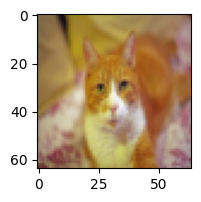

In [18]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Example of a picture
index = 24
plt.figure(figsize=(2,2))
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

You usually reshape and standardize the images according to your problem before feeding them to the network. In our case, we will flatten the images and normalize the pixel values between 0 and 1. The code is given in the cell below.

![Image to vector conversion.](./images/images/image2vector.png)

In [19]:
# Standardize data to have feature values between 0 and 1.
train_x_norm = train_x_orig/255
test_x_norm = test_x_orig/255

# Reshape the training and test examples 
train_x_flatten = train_x_norm.reshape(train_x_norm.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_norm.reshape(test_x_norm.shape[0], -1)

print ("train_x's shape: " + str(train_x_flatten.shape))
print ("test_x's shape: " + str(test_x_flatten.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

### 2 - Architecture of your model

**General Methodology**

In general, you will follow the Deep Learning methodology to build the model:

    1. Initialize parameters / Define hyperparameters
    
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
        
    4. Use trained parameters to predict labels

Let's now implement our model!

#### 2.1 - L-layer model

**Exercise** Use the helper functions you have implemented previously to build a generic $L$-layer neural network.

In [20]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=None):#lr was 0.009
    """
    Implements a L-layer neural network.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation
        y_pred, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(y_pred, Y)
        
        # Backward propagation
        grads = L_model_backward(y_pred, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every X training examples
        if print_cost and i % print_cost == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    # plot the cost
    plt.figure(figsize=(3,3))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

#### 2.2 - Training a model

**Exercise**: Use your generic L-layer model function to create a 3-layer neural network (with 24- and 8-unit hidden layers and 1-unit output layer) to perform the cat classification task. Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2000 iterations. Use a learning rate of 0.005. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

**Note.** The training data has shape `(n_samples, n_features)`, whereas the helper forward function is expecting `(n_features, n_samples)`. Remember to transpose the data. 

Cost after iteration 0: 0.690454
Cost after iteration 200: 0.505371
Cost after iteration 400: 0.376389
Cost after iteration 600: 0.294826
Cost after iteration 800: 0.199404
Cost after iteration 1000: 0.117669
Cost after iteration 1200: 0.071783
Cost after iteration 1400: 0.049698
Cost after iteration 1600: 0.036098
Cost after iteration 1800: 0.027483


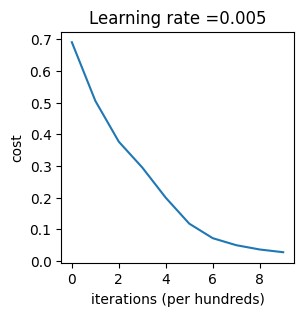

In [22]:
np.random.seed(1)

# Create model
layers_dims = [train_x_flatten.shape[1], 24, 8, 1] #  3-layer model (input, hidden_1, hidden_2, output)

# Train model
parameters = L_layer_model(X=train_x_flatten.T, 
                           Y=train_y,
                           layers_dims=layers_dims,
                           num_iterations = 2000,
                           learning_rate = 0.005,
                           print_cost = 200)

**Expected Output**:

```
Cost after iteration 0: 0.690454
Cost after iteration 200: 0.505371
...
Cost after iteration 1800: 0.027483
```

#### 2.3 - Evaluate your model

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this. Now, you can use the trained parameters to classify images from the dataset.

**Exercise.** Evaluate the performance of your trained model using the function `predict()` included in `dnn_utils.py`. Use both the training and testing data.

In [23]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [24]:
pred_train = predict(train_x_flatten.T, train_y, parameters)

Accuracy: 0.9999999999999998


**Expected output:**

```
Train Accuracy: 1.0
```

In [25]:
pred_test = predict(test_x_flatten.T, test_y, parameters)

Accuracy: 0.76


**Expected output:**

```
Train Accuracy: 0.76
```

It seems that your 3-layer neural network has a good performance (76%). This is good performance for this task with such a small dataset. Nice job!

Let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

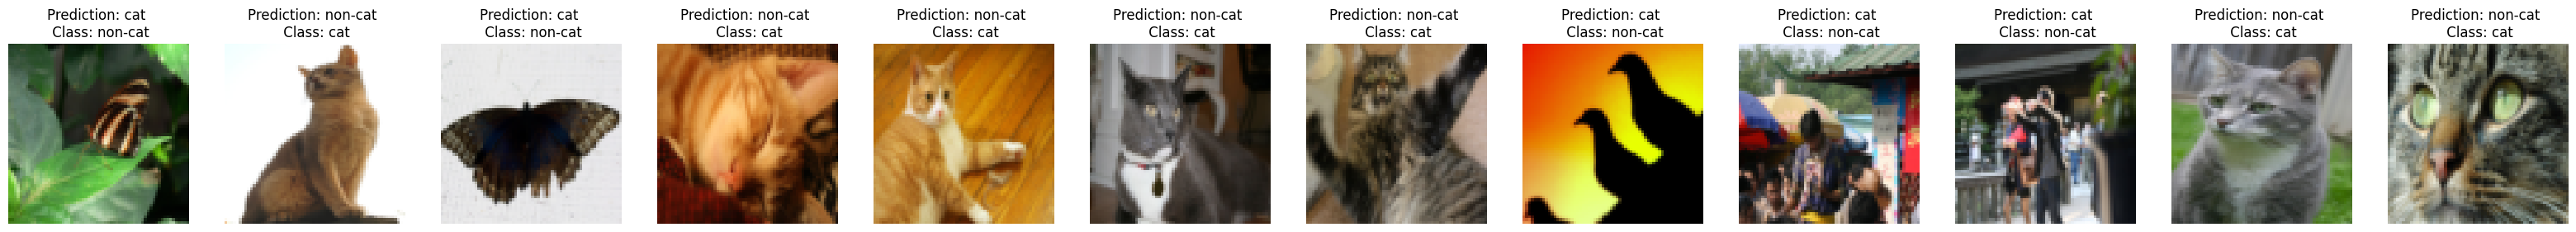

In [26]:
print_mislabeled_images(classes, test_x_flatten.T, test_y, pred_test)

**A few reasons why the model tends to do poorly include:** 
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 

## Problem 3. L-layer network using PyTorch

In the previous problem, you learned the basics of how a neural network works step by step: layer definitions, activation functions, forward pass, backward pass, parameter update, training, and prediction. All these steps were implemented by hand, using NumPy. However, we do not need to define everything from scratch every time we implement a neural network. There exist several Deep Learning frameworks with built-in functions that make the whole process way easier when it comes to neural network deployment.

Here, we introduce one of the most well-known Deep Learning framework, PyTorch. PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab. It provides a flexible and dynamic computational graph, making it easy to build and modify neural networks on-the-fly. With this framework, you will build the same network as before, and you will see the difference in both performance and time.

### Build your network

In the previous problem, we defined by hand how to initialize the parameters $W$ and $b$, the estimation of the linear module $Z$, and the application of the activation layer $a$. Then, with these functions, we built our L-layer model. Let's try to build the same network in PyTorch.

**Exercise.** Create a generic function to build a L-layer model using PyTorch. Then, implement the same L-layer neural network as the previous problem, with 24-, 8-, and 4-unit hidden layers and 1-unit output layer.

To achieve this, we will first build an empty module list where we will append/add the layers we want (exactly the same as a list). A fully connected layer can be added as `nn.Linear()` ([Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)), where the shape of the input and output features need to be specified. Before adding the layer to the module list, we can initialize the layer parameters.

**Note:** 
- Since LeCun initialization is not implemented in PyTorch, you will use Xavier (or Glorot) initialization for simplicity. Use `nn.init.xavier_normal_`.
- In PyTorch, you define separetely the layers and the forward pass. Then, during the forward pass, you specify how the input data flows through the various layers and activations to produce the output.
- Remember to use `relu` for the hidden layers and `sigmoid`. 

In [27]:
# Second set of libraries to load

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

from cnn_utils import *

In [28]:
class L_layer_model_torch(nn.Module):
    def __init__(self, layer_dims):
        """
        Build a fully connected neural network

        Arguments:
        layer_dims -- dimensions of the layers (input, hidden1, hidden2, ..., hiddenL, output)
        """
        super(L_layer_model_torch, self).__init__()
        self.layers = nn.ModuleList()

        # Weight initializer with fixed seed for reproducibility
        torch.manual_seed(1)
        initializer = nn.init.xavier_normal_

        # Input layer
        layer = nn.Linear(layer_dims[0], layer_dims[1], bias=True)
        initializer(layer.weight)
        self.layers.append(layer)

        # Hidden layers
        for l in range(1, len(layer_dims) - 2):
            layer = nn.Linear(layer_dims[l], layer_dims[l+1], bias=True)
            initializer(layer.weight)
            self.layers.append(layer)
        
        # Output layer
        layer =  nn.Linear(layer_dims[-2], layer_dims[-1], bias=True)
        initializer(layer.weight)
        self.layers.append(layer)

    def forward(self, x):
        """
        Computation performed at every call.

        Arguments:
        x -- Input data
        """
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers) - 1:
                x = F.relu(x) # ReLU, from torch
            else:
                x = F.sigmoid(x) # sigmoid, from F (toruch.nn.functional)
        return x

### Training configuration

In the previous exercise, we generated what we had called parameter initialization and forward propagation in Problem 1. Now, let's move to the cost function, backward propagation, and parameter update. These steps are implemented in PyTorch by setting an `optimizer` ([Documentation](https://pytorch.org/docs/stable/optim.html)) and a criterion to implement backpropagation. In our case, we will use to binary cross-entropy loss `nn.BCELoss()`  ([Documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#bceloss)).

**Exercise.** Configure your model for training using the same configuration as in Problem 2. This means that you have to set the same number of units/layers and to compute the binary cross-entropy cost (for the binary classification scenario) and the stochastic gradient descent (SGD) algorithm for updating the parameters:

`p = p - learning_rate * grads`

where `p` is any parameter. Set the learning rate to 0.005.

**Note.** Call the `Module` instance (your model) instead of the `forward()` function to run the forward pass. Backpropagation is run internally according to the model architecture we have created and the configuration for training we have set.

In [31]:
# Define your model
layers_dims = [train_x_flatten.shape[1], 24, 8, 1]  # input, hidden1, hidden2, output
model = L_layer_model_torch(layers_dims)

# Print the model summary
summary(model, input_size=(layers_dims[0],))

# Set SGD optimizer with learning rate 0.005
optimizer = optim.SGD(model.parameters(), lr=0.005)
criterion = nn.BCELoss()


Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Linear: 2-1                       294,936
|    └─Linear: 2-2                       200
|    └─Linear: 2-3                       9
Total params: 295,145
Trainable params: 295,145
Non-trainable params: 0


**Expected output:**

```
Layer -- Shape -- Param

Linear -- (-1, 24) -- 294936
Linear -- (-1, 8) -- 200
Linear -- (-1, 1) -- 9
```

### Train the model

In PyTorch, the training process typically involves defining a custom training loop. This way, PyTorch gives you more control and requires you to explicitly define the steps for training. The training loop consists of:

- Loop through the number of epochs.
- For each batch of data, perform the following steps:
    - Zero the gradients.
    - Perform a forward pass.
    - Compute the loss.
    - Perform a backward pass (compute gradients).
    - Update the weights using the optimizer.

**Exercise.** Train the model over 2000 epochs (similar to Problem 2). Use the whole dataset per gradient update. Check if the loss value at epoch 1 matches the expected output below; if not, click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error. **Remember to redefine the model every time you want to rerun the training cell. To do so, just run again the cell where you define the model, the optimizer and the criterion.**

**Note.** Training data must be given with shape `(n_samples, n_features)`, while the labels must be given as 1D array with shape `(n_samples,)`.

In [32]:
# Train the model
print_callback = 200
num_epochs = 2000

# Convert data to tensors
tensor_train_x = torch.tensor(train_x_flatten, dtype=torch.float32)
tensor_train_y = torch.tensor(train_y[0], dtype=torch.float32)

# Set the model in training mode
model.train()

for epoch in range(num_epochs):
    
    # Set gradients to zero
    optimizer.zero_grad()

    # Forward pass
    outputs =  model(x=tensor_train_x)

    # Compute loss
    loss = criterion(input=outputs.squeeze(), target=tensor_train_y)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Call the custom callback
    if epoch % print_callback == 0 or epoch == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.8928
Epoch 200, Loss: 0.4669
Epoch 400, Loss: 0.3276
Epoch 600, Loss: 0.2124
Epoch 800, Loss: 0.1195
Epoch 1000, Loss: 0.0659
Epoch 1200, Loss: 0.0427
Epoch 1400, Loss: 0.0306
Epoch 1600, Loss: 0.0230
Epoch 1800, Loss: 0.0180


**Expected output:**

```
Epoch 0 - loss: 0.8928 
Epoch 200 - loss: 0.4669 
...
Epoch 2000 - loss: 0.0180 
```

### Evaluate your model

Similar to the training stage, we need to manually define the evaluation step of our model.

In [33]:
# Switch to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    outputs = model(tensor_train_x)
    predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions (threshold at 0.5)
    correct_predictions = (predictions == tensor_train_y.unsqueeze(1) ).float().sum()  # Count correct predictions
    train_acc = correct_predictions / tensor_train_y.shape[0]  # Calculate accuracy

print("Training accuracy = %.2f" % train_acc)

Training accuracy = 1.00


**Expected output:**

```
Training accuracy = 1.0
```

In [34]:
# Define test set as tensors
tensor_test_x = torch.tensor(test_x_flatten, dtype=torch.float32)
tensor_test_y = torch.tensor(test_y[0], dtype=torch.float32)

# Switch to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    outputs = model(tensor_test_x)
    predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions (threshold at 0.5)
    correct_predictions = (predictions == tensor_test_y.unsqueeze(1) ).float().sum()  # Count correct predictions
    test_acc = correct_predictions / tensor_test_y.shape[0]  # Calculate accuracy

print("Test accuracy = %.2f" % test_acc)

Test accuracy = 0.76


**Expected output:**

```
Test accuracy = 0.76
```

### Conclusion

As you can see, we have obtained a similar result as in Problem 2, using much fewer code lines and in a very optimal time. Good job!

Let's finally move to the well-known Convolutional Neural Networks!

## Problem 4. CNN in a nutshell

Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for processing structured grid data, such as images. 

### Key properties
- **Local Receptive Fields**: Each neuron in a convolutional layer is connected to a local region of the input, known as the receptive field. It allows the network to learn local patterns and features, such as edges and textures, which are crucial for understanding images.
- **Parameter sharing**: The filters (kernels) are applied across the entire input image, sharing the same weights and biases. It reduces the number of parameters and computational complexity, making the model more efficient and less prone to overfitting.
- **Spatial Hierarchy of Features**: As data passes through successive convolutional layers, the network learns increasingly complex and abstract features. Lower layers capture simple patterns (e.g., edges), while higher layers capture complex patterns (e.g., shapes).
- **Translation Invariance**: Due to the local receptive fields and shared weights, CNNs are inherently robust to translations (shifts) in the input image. Thus, the model can recognize objects regardless of their position in the image.

### General structure

A CNN model is usually formed by a feature extraction module and a classification module. This is an example of a simple CNN architecture:

- **Feature extraction**: Process of transforming the raw data into a set of characteristics (features) that can be used to perform a specific task. The main layers involved in this module are:
    - *CNN layer*: Use small, learnable matrices (e.g., 3x3, 5x5) that slide over the input image. Each matrix (also called filter or kernel) performs a convolution operation, producing a feature map that detects specific patterns.
    - *Activation layer*: A non-linear function like ReLU is applied to introduce non-linearity.
    - *Pooling layer*: Reduces the spatial dimensions of the feature maps while retaining the most important features. It reduces the amount of parameters and computation in the network, controlling overfitting and making the model invariant to small translations of the input.
      
- **Classifier**: Perform high-level reasoning and classification based on the features extracted by the convolutional layers. It is usually formed by:
    - *Flattening layer*: Converts the feature maps into a 1D vector to prepare it for the fully connected layers.
    - *Dense layer*: A standard FC layer with a specific number of neurons depending on the classification task.

<img src="./images/cnn.png" style="width:450px;height:200px;">

<caption><center> <u>Figure 2</u>: General CNN architecture. <br> </center></caption>

In this problem, we will look into the feature extraction module, particularly focusing on the basics of convolution and pooling operations.

### Convolution

In Assignment 3, we learned how the convolution operation works. We saw that, in order to keep the same image dimensions, a padding step prior to the convolution was required. Then, a Prewitt or Sobel kernel slid over the image to produce a feature map with information about the edges. Let's implement the same operation using a real image from our dataset.

![Illustration of CNN](./images/images/convolution.png)

**Exercise.** In this exercise, you will take a cat image from the dataset and implement convolution using the $3\times 3$ Sobel mask with a stride of $1$. For simplicity, use only the Sobel kernel for the x-axis. Use the `same_padding_size`, `zero_padding_rgb`, and `cross_correlation_cnn` functions provided in `cnn_utils.py`.

**It is important to highlight that CNN performs the convolution operation without explicitly flipping the kernel. This operation is technically the "cross-correlation." However, in the context of deep learning, the term "convolution" is commonly used to describe this operation.**


In [35]:
# Select the cat image
img = train_x_norm[24]

# Define 2D kernel (Sobel in x-axis) and extend to 3D.
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]
                   ], dtype="float32")

sobel_x_3d = np.stack((sobel_x,)*3, axis=-1)

# Stride
stride = 1

In [37]:
# Find padding size
pad_y, pad_x = same_padding_size(img, sobel_x, stride)

# Apply zero-padding
pad_img = zero_padding_rgb(img, pad_y, pad_x)

# Apply convolution (cross-correlation)
conv_img = cross_correlation_cnn(pad_img, sobel_x_3d, stride)

print("Padding to add to every horizontal border in the image: ", pad_y)
print("Padding to add to every vertical borderin the image: ", pad_x)

print("\nExample of padding: \n", pad_img[0:5,0:5,0])

print("\nShape of the original image: ", img.shape)
print("Shape of the padded image: ", pad_img.shape)
print("Shape of the convolved image: ", conv_img.shape)

Padding to add to every horizontal border in the image:  1
Padding to add to every vertical borderin the image:  1

Example of padding: 
 [[0.         0.         0.         0.         0.        ]
 [0.         0.47843137 0.48627451 0.49019608 0.49411765]
 [0.         0.48627451 0.49411765 0.49411765 0.49803922]
 [0.         0.49019608 0.49803922 0.50196078 0.50196078]
 [0.         0.49019608 0.49803922 0.50588235 0.51372549]]

Shape of the original image:  (64, 64, 3)
Shape of the padded image:  (66, 66, 3)
Shape of the convolved image:  (64, 64)


**Expected output**

```
Padding to add to every horizontal border in the image:  1
Padding to add to every vertical borderin the image:  1

Example of padding: 
 [[0.         0.         0.         0.         0.        ]
 [0.         0.47843137 0.48627451 0.49019608 0.49411765]
 [0.         0.48627451 0.49411765 0.49411765 0.49803922]
 [0.         0.49019608 0.49803922 0.50196078 0.50196078]
 [0.         0.49019608 0.49803922 0.50588235 0.51372549]]

Shape of the original image:  (64, 64, 3)
Shape of the padded iamge:  (66, 66, 3)
Shape of the convolved image:  (64, 64)
```

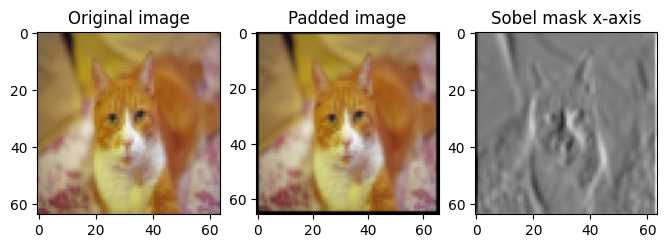

In [38]:
# Display the result
plt.figure(figsize=(8,8))
plt.subplot(131), plt.imshow(img), plt.title('Original image')
plt.subplot(132), plt.imshow(pad_img), plt.title('Padded image')
plt.subplot(133), plt.imshow(conv_img, cmap='gray'), plt.title('Sobel mask x-axis')
plt.show()

As you can see, this looks pretty much like what we did in Assignment 3: finding edges in the image. 

Let's move to the pooling operation. 

### Pooling

This essential operation in Convolutional Neural Networks (CNNs) serves to progressively reduce the spatial dimensions of the input feature maps while retaining important features. As mentioned before, pooling also helps in making the representations invariant to small translations and distortions, reducing computational complexity, and controlling overfitting.

The pooling operation uses a window that slides over the input image given a specific stride. On each window, it computes an operation that reduces the whole window to a single number. Maximum or average are usually employed as operators (MaxPooling or AveragePooling). The pooling operation is applied to each channel independently.

![Representation of pooling operation](./images/images/pooling.png)

**Exercise.** Use the `pooling()` function that takes a feature map and applies the pooling operation given a specific operator. Use the feature map extracted from the convolution and display the resultant reduced feature map after computing both MaxPooling and AveragePooling with a pool size and a stride of 2.

In [40]:
avg_pool_img = pooling(conv_img, pool_size=2, stride=2, mode="average")
max_pool_img = pooling(conv_img, pool_size=2, stride=2, mode="max")



print("Shape of the feature map: ", conv_img.shape)
print("\nShape after max pooling: ", max_pool_img.shape)
print("Example of max pooling: \n", conv_img[0:2, 0:2], max_pool_img[0, 0])
print("\nShape after avg pooling: ", avg_pool_img.shape)
print("Example of avg pooling: \n", conv_img[0:2, 0:2], avg_pool_img[0, 0])

Shape of the feature map:  (64, 64)

Shape after max pooling:  (32, 32)
Example of max pooling: 
 [[-3.49803922 -0.07843137]
 [-4.70588235 -0.08235294]] -0.07843137254901933

Shape after avg pooling:  (32, 32)
Example of avg pooling: 
 [[-3.49803922 -0.07843137]
 [-4.70588235 -0.08235294]] -2.091176470588235


**Expected output**

```
Shape of the feature map:  (64, 64)

Shape after max pooling:  (32, 32)
Example of max pooling: 
 [[-3.49803922 -0.07843137]
 [-4.70588235 -0.08235294]] -0.07843137254901933

Shape after avg pooling:  (32, 32)
Example of avg pooling: 
 [[-3.49803922 -0.07843137]
 [-4.70588235 -0.08235294]] -2.091176470588235
```

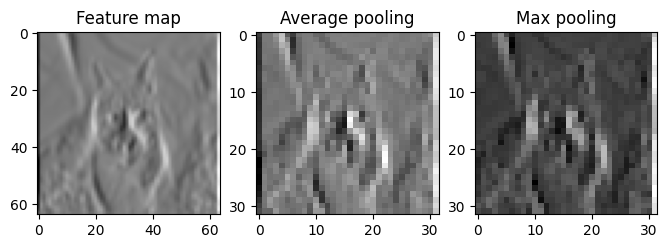

In [41]:
# Display the result
plt.figure(figsize=(8,8))
plt.subplot(131), plt.imshow(conv_img, cmap='gray'), plt.title("Feature map")
plt.subplot(132), plt.imshow(avg_pool_img, cmap='gray'), plt.title("Average pooling")
plt.subplot(133), plt.imshow(max_pool_img, cmap='gray'), plt.title("Max pooling")
plt.show()

### Conclusion

Congrats! You have learned the most fundamental operations in a CNN. 

Of course, we are missing some important steps, like the activation function after the convolution, or the use of a regularizer to gain stability during training. At the same time, we have used the same fixed kernel (Sobel mask) in each channel, and we have not added any bias. In a real CNN implementation, a different kernel is employed in each channel, and the weights and biases are learned during training.

![Convolution of RGB images](./images/images/rgb_conv.png)

We will see the full implementation of a CNN model in PyTorch in the next problem.

## Problem 5. CNN implementation in PyTorch

In this problem, we will implement a CNN model for our binary classification problem. To do so, we will make use of the following layers (in order):

- `Conv2d`: Applies the convolution to image data.
- `BatchNorm2d`: Normalizes the inputs to each layer, stabilizing and speeding up the training process.
- `ReLU`: Non-linear activation function.
- `MaxPool2d`: Reduces the dimensions of the feature map.

You can find information about all the layers employed in the [PyTorch documenatation](https://pytorch.org/docs/stable/nn.html).

**Exercise.** Create an L-layer CNN model following the feature extraction module mentioned above. In the `Conv2d` layer, specify the number of channels in the input image, the number of channels produced by the convolution, and the size of the convolving kernel. In particular, we will use 8 filters with a kernel size of $7\times7$ in the first layer and 16 filters with a kernel size of 3 in the second layer. For the classifier, we will flatten the shape of the previous layer and apply a 1-unit FC layer with sigmoid.

Then, train the CNN model over 200 epochs. Use the SGD optimizer with a learning rate of 0.0025 and `BCELoss()`. To optimize the process, we will define a PyTorch DataLoader object with `batch_size` of 32 and without shuffling (for reproducibility). Which input data should you use this time? Image format or flat format?

Check if the loss value at epoch 1 matches the expected output below; if not, click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error. **Remember to redefine the model every time you want to rerun the training cell. To do so, just run again the cell where you define the model, the optimizer and the criterion.**

**Note.** 
- As mentioned earlier, initial CNN layers capture low-level features (edges, textures), while deeper layers capture high-level features (shapes, objects). Due to this, the number of filters is typically increased with the depth of the network. It is also a common practice to use larger kernels (e.g., 7x7) in the early layers to capture more spatial information. Later layers can use smaller kernels (e.g., 3x3) to capture those finer details and reduce computational complexity.
- PyTorch use $(C, H, W)$ convention for referring to the image shape.

In [42]:
class cnn_model_torch(nn.Module):
    def __init__(self, filters, kernels, input_shape):
        super(cnn_model_torch, self).__init__()
        
        self.conv_layers = nn.ModuleList()
        in_channels = input_shape[0]

        # Weight initializer
        torch.manual_seed(1)
        initializer =  nn.init.xavier_normal_

        # Create convolutional layers
        for filter_size, kernel_size in zip(filters, kernels):
            conv_layer = nn.Conv2d(in_channels=in_channels, 
                                   out_channels=filter_size,
                                   kernel_size=kernel_size, 
                                   padding='same')
            initializer(conv_layer.weight)
            self.conv_layers.append(conv_layer)
            self.conv_layers.append(nn.BatchNorm2d(filter_size))
            self.conv_layers.append(nn.ReLU())
            self.conv_layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            in_channels = filter_size

        #####
        # Flatten and output layers are not appended since they are not CNN-related layers and they are handled separately during the forward pass.
        #####
        
        # Flatten layer
        self.flatten = nn.Flatten()

        # Output layer
        self.flattened_size = self._calculate_flattened_size(input_shape, len(filters)) # Calculate the size of the flattened layer
        self.fc = nn.Linear(self.flattened_size, 1)
        initializer(self.fc.weight)

    def _calculate_flattened_size(self, input_shape, num_pools):
        # Calculate the size of the flattened layer after all conv and pool layers
        height, width = input_shape[1], input_shape[2]
        for _ in range(num_pools):
            height //= 2
            width //= 2
        return filters[-1] * height * width

    def forward(self, x):
        """
        Computation performed at every call.

        Arguments:
        x -- Input data
        """
        # Conv layers
        for layer in self.conv_layers:
            x = layer(x)
        # Flatten and output layer
        x = self.flatten(x)
        x = torch.sigmoid(self.fc(x))
        return x

In [43]:
# Build the model
filters = [8, 16]
kernels = [7, 3]
input_shape = (3, num_px, num_px) # (C, H, W)
model = cnn_model_torch(filters, kernels, input_shape)

# Print the model summary
summary(model, input_size=input_shape)

# Set SGD optimizer with learning rate 0.0025
optimizer = optim.SGD(model.parameters(), lr=0.0025) 

# Define criterion as binary cross-entropy loss to train the model
criterion = nn.BCELoss()

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Conv2d: 2-1                       1,184
|    └─BatchNorm2d: 2-2                  16
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Conv2d: 2-5                       1,168
|    └─BatchNorm2d: 2-6                  32
|    └─ReLU: 2-7                         --
|    └─MaxPool2d: 2-8                    --
├─Flatten: 1-2                           --
├─Linear: 1-3                            4,097
Total params: 6,497
Trainable params: 6,497
Non-trainable params: 0


**Expected output:**

```
Layer -- Shape -- Param

Conv2D -- (-1, 64, 64, 8) -- 1184
BatchNorm -- (-1, 64, 64, 8) -- 16
ReLU -- (-1, 64, 64, 8) -- 0
MaxPool2D -- (-1, 32, 32, 8) -- 0
Conv2D -- (-1, 32, 32, 16) -- 1168
BatchNorm -- (-1, 32, 32, 16) -- 32
ReLU -- (-1, 32, 32, 16) -- 0
MaxPool2D -- (-1, 16, 16, 16) -- 0
Flatten -- (-1, 4096) -- 0
Dense -- (-1, 1) -- 4097
```

In [44]:
# Train the model
print_callback = 20
num_epochs = 200
batch_size = 32

# Create dataset and dataloader. Use the non-flattened normalized images!!
tensor_train_x = torch.tensor(train_x_norm, dtype=torch.float32).permute(0, 3, 1, 2)
tensor_train_y = torch.tensor(train_y[0], dtype=torch.float32)

train_dataset = TensorDataset(tensor_train_x, tensor_train_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        
        optimizer.zero_grad()
    
        outputs = model(x=inputs)
        loss = criterion(input=outputs.squeeze(), target=labels)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Call the custom callback
    if epoch % print_callback == 0 or epoch == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss:.4f}')   

Epoch 0, Loss: 0.6976
Epoch 20, Loss: 0.2124
Epoch 40, Loss: 0.1410
Epoch 60, Loss: 0.1016
Epoch 80, Loss: 0.0808
Epoch 100, Loss: 0.0629
Epoch 120, Loss: 0.0502
Epoch 140, Loss: 0.0410
Epoch 160, Loss: 0.0347
Epoch 180, Loss: 0.0296


**Expected output:**

```
Epoch 0 - loss: 0.6976 
Epoch 20 - loss: 0.2119
...
Epoch 180 - loss: 0.0297
```

Let's evaluate the performance of the model.

In [45]:
# Switch to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    outputs = model(tensor_train_x)
    predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions (threshold at 0.5)
    correct_predictions = (predictions == tensor_train_y.unsqueeze(1) ).float().sum()  # Count correct predictions
    train_acc = correct_predictions / tensor_train_y.shape[0]  # Calculate accuracy

print("Training accuracy = %.2f" % train_acc)

Training accuracy = 0.97


**Expected output:**

```
Test accuracy = 0.97
```

In [46]:
# Convert data to tensors
tensor_test_x = torch.tensor(test_x_norm, dtype=torch.float32).permute(0, 3, 1, 2)
tensor_test_y = torch.tensor(test_y[0], dtype=torch.float32)

# Switch to evaluation mode
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    outputs = model(tensor_test_x)
    predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions (threshold at 0.5)
    correct_predictions = (predictions == tensor_test_y.unsqueeze(1) ).float().sum()  # Count correct predictions
    test_acc = correct_predictions / tensor_test_y.shape[0]  # Calculate accuracy

print("Test accuracy = %.2f" % test_acc)

Test accuracy = 0.82


**Expected output:**

```
Test accuracy = 0.82
```

Hooray! We have improved our model from 76% to 82% by using CNN instead of Dense layers!

Notice the differences between both models. First, the parameter sharing property of CNN allows us to reduce the number of model parameters from 295177 to 6497, **ALMOST A 98% OF REDUCTION!!!**. At the same time, the model converges with a lower number of iterations, even though each iteration may take longer due to the convolution. 

## Assignment Conclusion

We hope this assignment was useful for you and provided valuable insights into the world of deep learning with PyTorch. Through this session, you have:
- Understand the maths, statistics, and operations behind Deep Learning that are crucial during the making-decision stage of data preprocessing, building the model architecture, and configuring the training/testing.
- Explored PyTorch: Gained hands-on experience with one of the most popular deep learning frameworks, understanding its core functionalities and how to effectively utilize its tools and libraries.
- Learned About CNNs: Delved into Convolutional Neural Networks (CNNs), understanding their architecture, layers, and how they are employed to solve complex image recognition and classification tasks.
- Applied Best Practices: Implemented best practices for designing and training CNNs, including the use of Batch Normalization, ReLU activations, and pooling layers to enhance model performance and stability.
- Developed Practical Skills: Enhanced your practical skills by building, training, and evaluating models from scratch, preparing you for more advanced topics and real-world applications in deep learning.

Keep experimenting, stay curious, and continue exploring the fascinating field of deep learning!

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no